# ANN Algoithm on Churn Model Dataset

<b> Load Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [4]:
#loading data

data = pd.read_csv(r"C:\Users\santhosh\Downloads\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b> Data Clean

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.drop(['RowNumber', 'Surname', 'Geography', 'Gender'], axis=1, inplace=True)

<b> Exploratory Data Analysis

<Axes: xlabel='Exited', ylabel='count'>

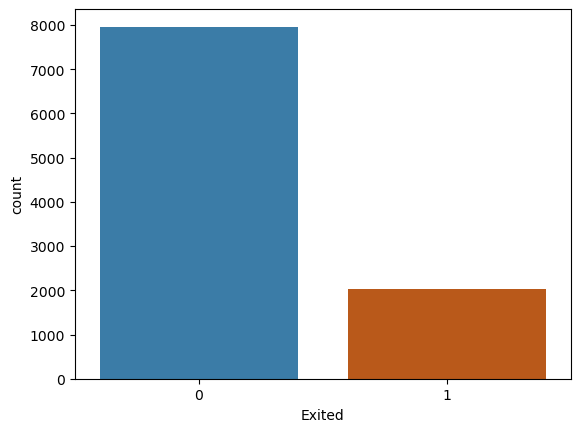

In [7]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

cols= ["#2980B9","#D35400"]
sns.countplot(x= data["Exited"], palette= cols)

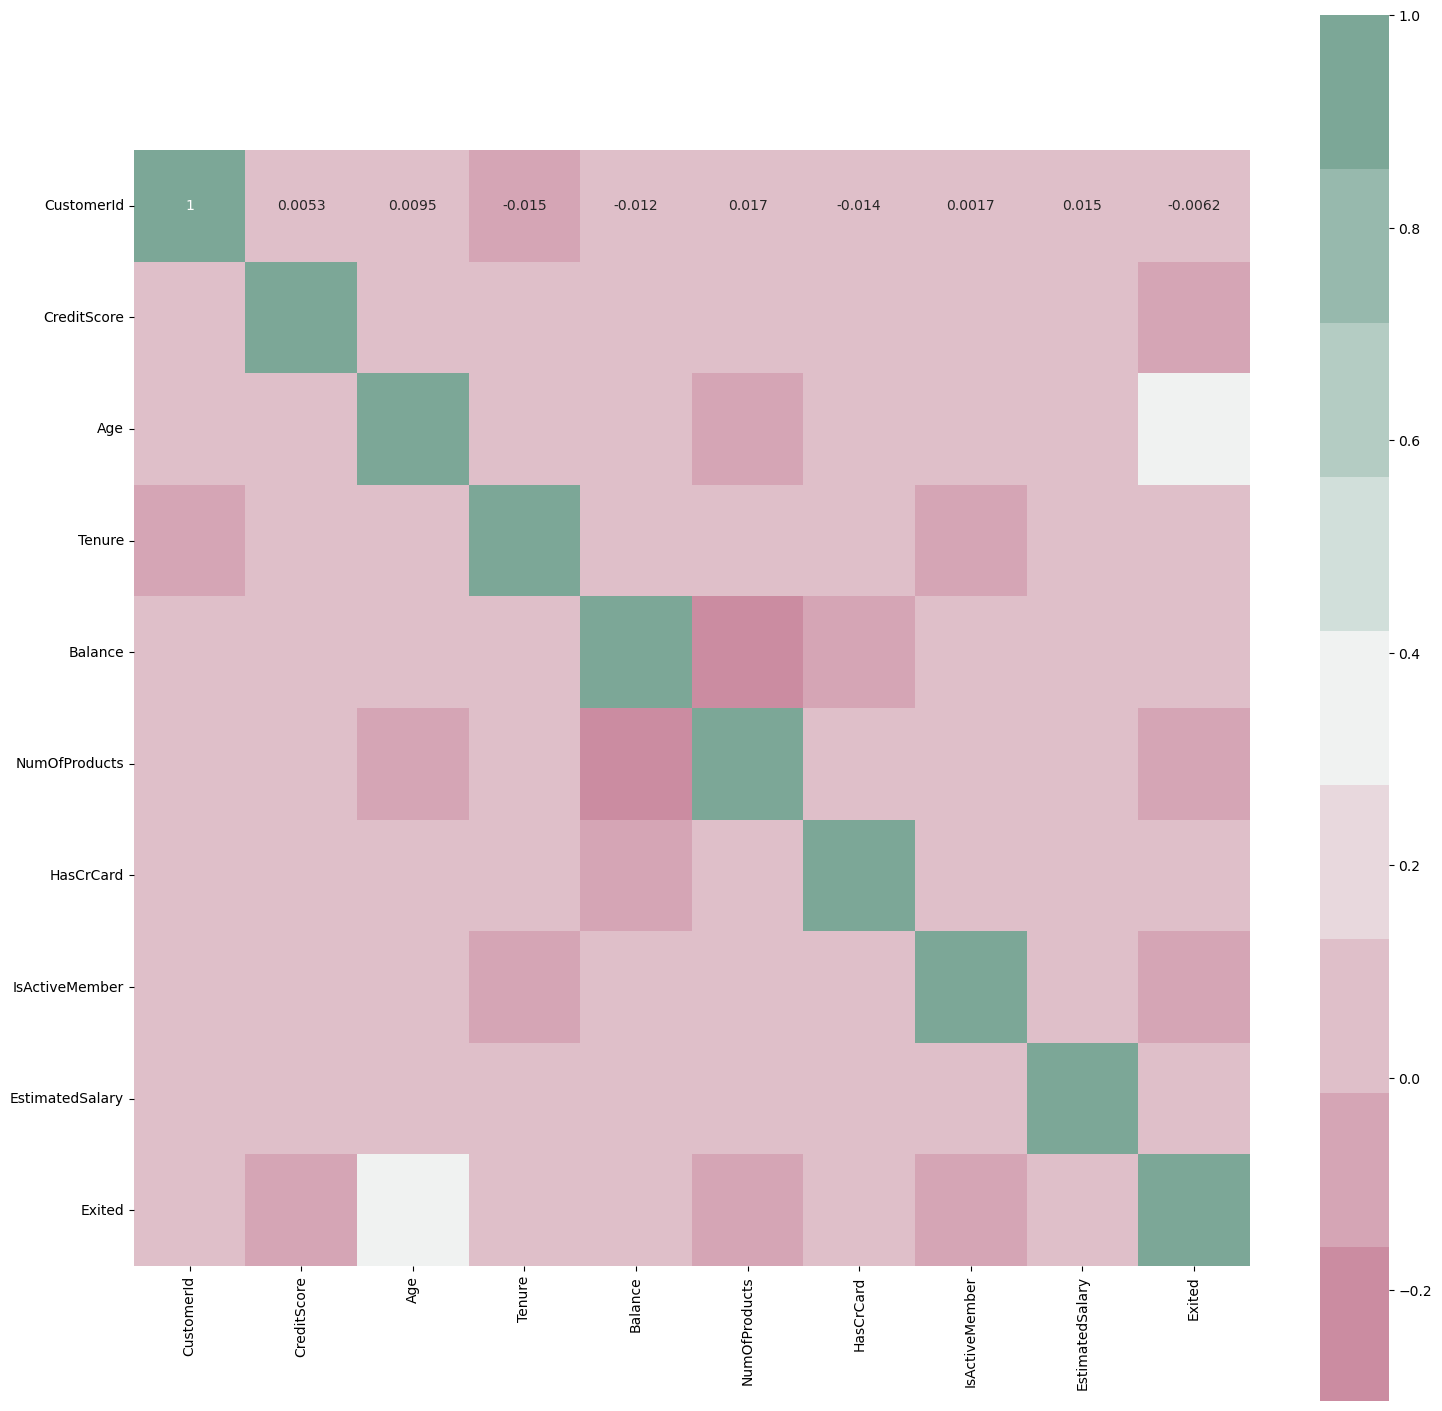

In [8]:
#Examaning a corelation matrix of all the features 

cmap = sns.diverging_palette(350,520,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

AttributeError: 'numpy.int64' object has no attribute 'startswith'

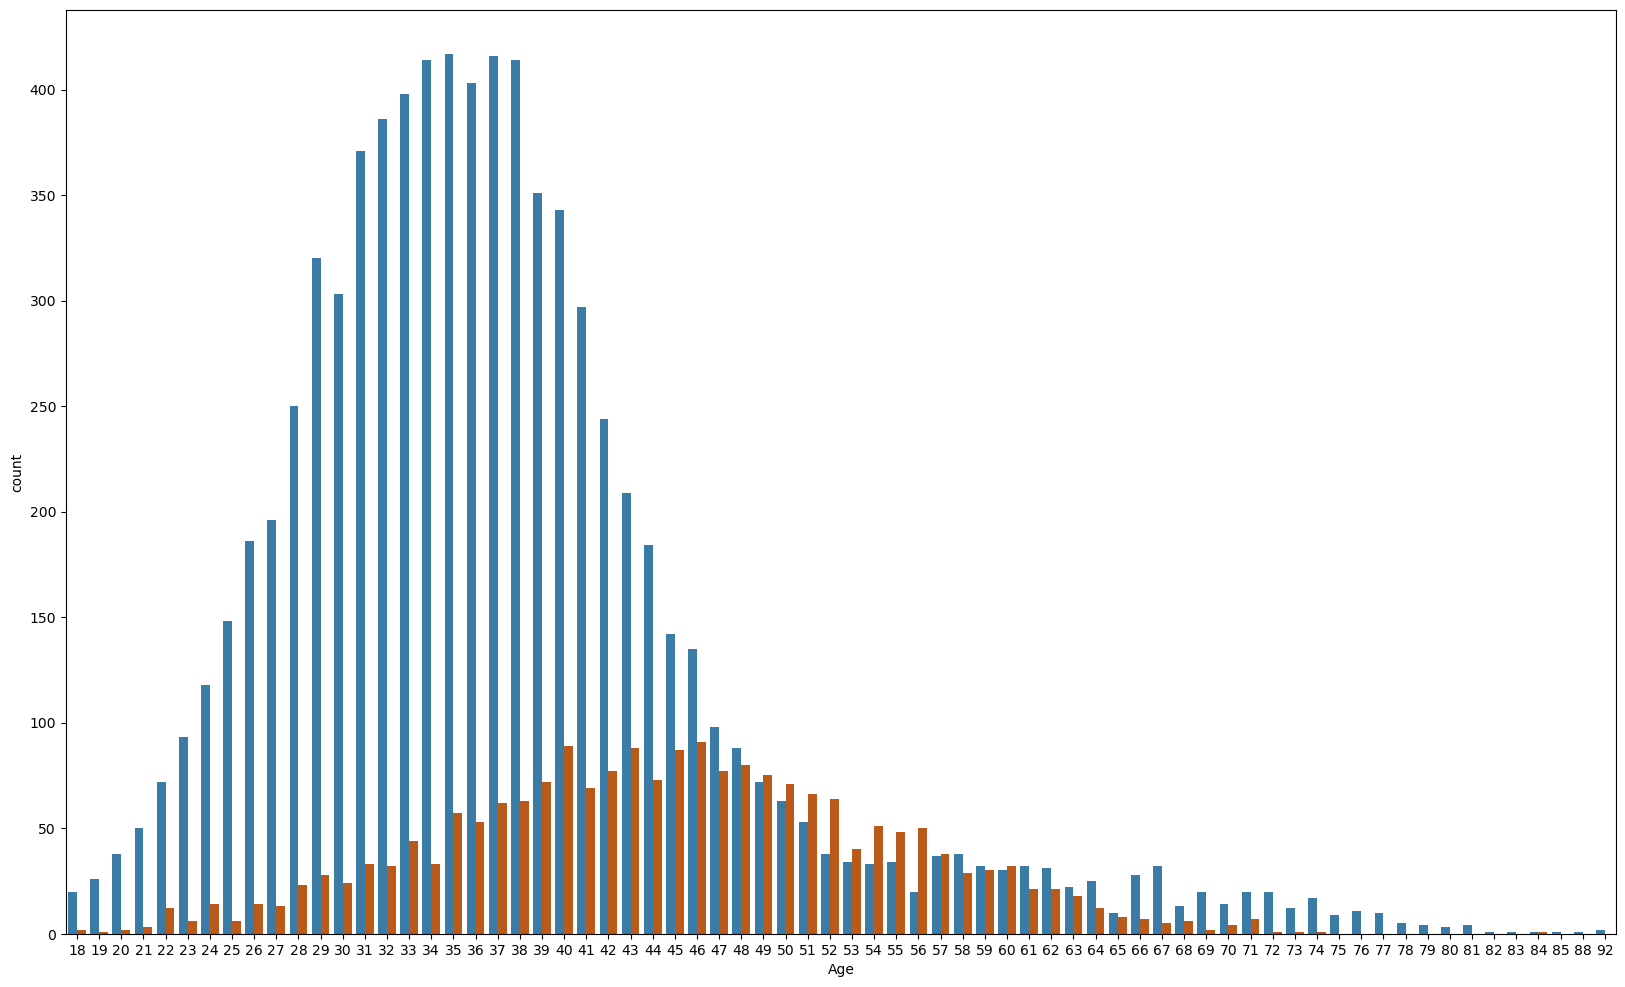

In [9]:
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=data['Age'],data=data, hue ="Exited",palette = cols)

<b> Feature Engineering

In [ ]:
# Boxen and swarm plot of some non binary features.
feature = ['CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=data["Exited"], y=data[i], color="black", alpha=0.5)
    sns.boxenplot(x=data["Exited"], y=data[i], palette=cols)
    plt.show()

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [11]:
#assigning values to features as X and target as y
X=data.drop(["Exited"],axis=1)
y=data["Exited"]

In [12]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,7.583978e-15,1.00005,-1.741069,-0.867650,-0.002816,0.865994,1.734255
CreditScore,10000.0,-4.824585e-16,1.00005,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.318146e-16,1.00005,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,-1.078249e-16,1.00005,-1.733315,-0.695982,-0.004426,0.687130,1.724464
Balance,10000.0,-6.252776e-17,1.00005,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,1.634248e-17,1.00005,-0.911583,-0.911583,-0.911583,0.807737,4.246377
HasCrCard,10000.0,-5.258016e-17,1.00005,-1.547768,-1.547768,0.646092,0.646092,0.646092
IsActiveMember,10000.0,-7.389644e-17,1.00005,-1.030670,-1.030670,0.970243,0.970243,0.970243
EstimatedSalary,10000.0,-2.877698e-17,1.00005,-1.740268,-0.853594,0.001803,0.857243,1.737200


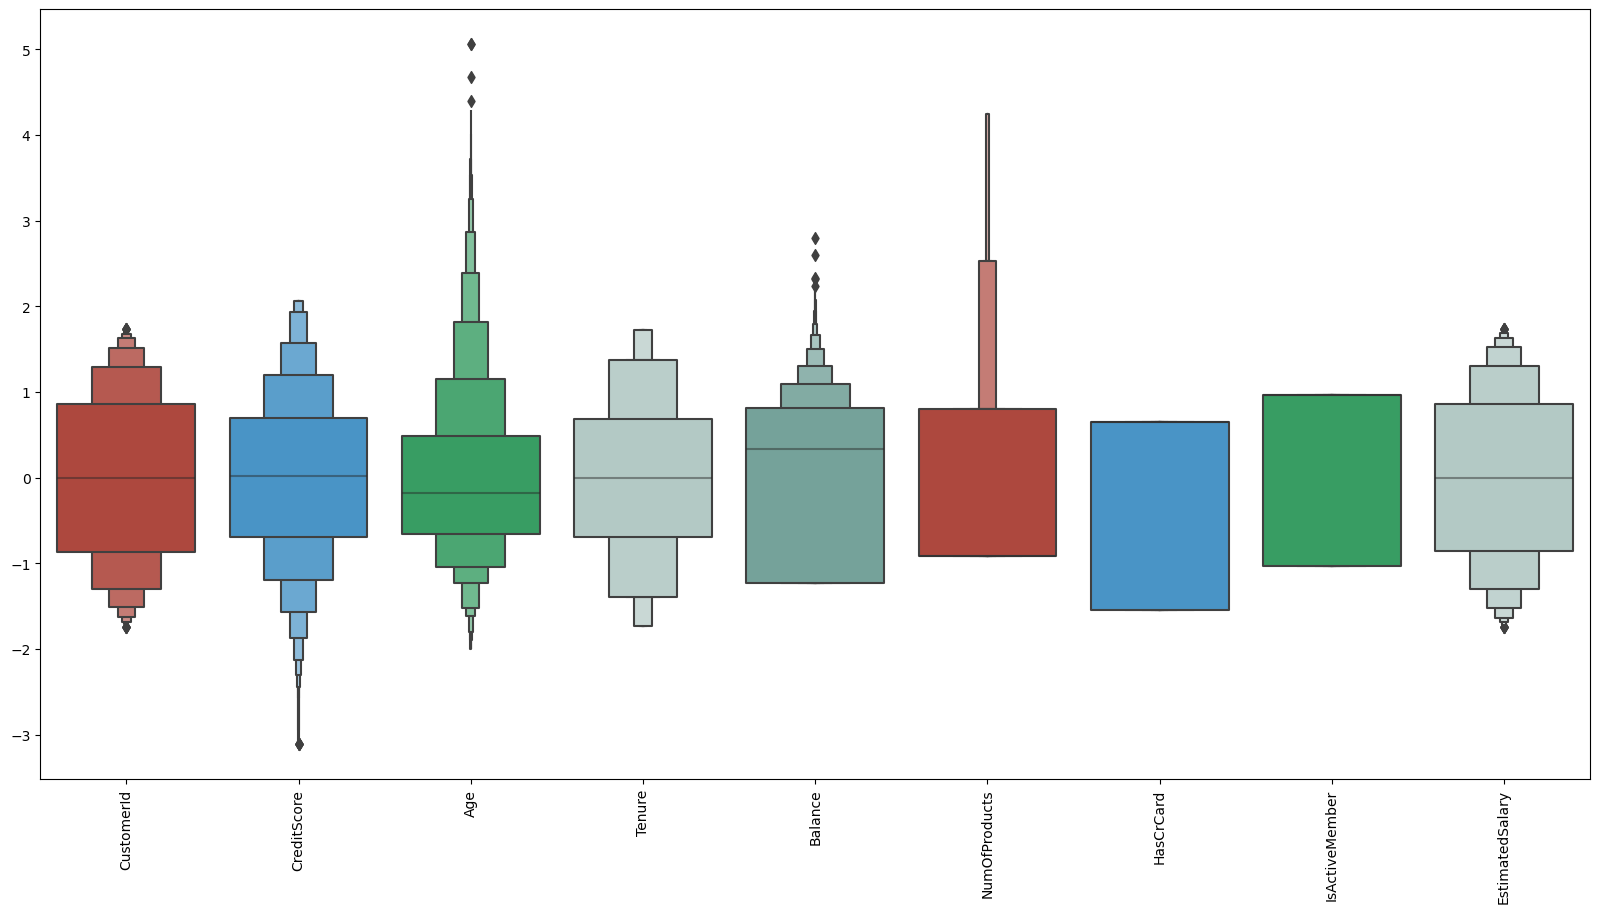

In [14]:
#looking at the scaled features
colours =["#C0392B","#3498DB","#27AE60","#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

<b> Train- Test Split

In [15]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=42)

<b> Model Building

In [17]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layer 1
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
# layer 2
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
#layer 3
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
#layer 4
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

from keras.optimizers import SGD

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8132 - loss: 0.6586 - val_accuracy: 0.7953 - val_loss: 0.4668
Epoch 2/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7902 - loss: 0.5055 - val_accuracy: 0.7953 - val_loss: 0.4469
Epoch 3/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7903 - loss: 0.4877 - val_accuracy: 0.7953 - val_loss: 0.4415
Epoch 4/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7926 - loss: 0.4781 - val_accuracy: 0.7953 - val_loss: 0.4411
Epoch 5/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4653 - val_accuracy: 0.7953 - val_loss: 0.4405
Epoch 6/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4603 - val_accuracy: 0.7953 - val_loss: 0.4395
Epoch 7/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.4623 - val_accuracy: 0.7953 - val_loss: 0.4402
Epoch 8/500
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8031 - loss: 0.4619 - val_accu

In [18]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 79.53%


<b> Model Evalution

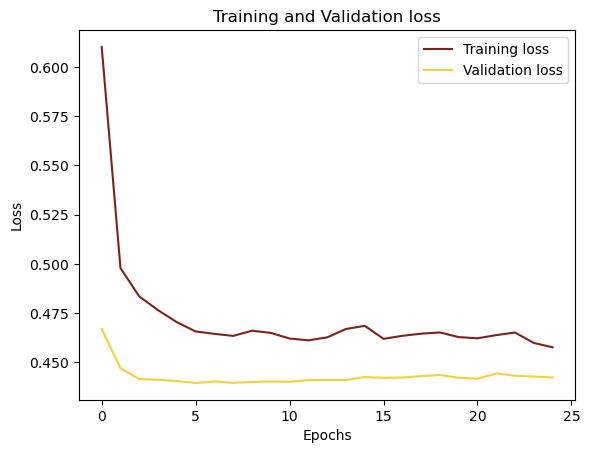

In [20]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#7B241C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#F4D03F", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

<b>Model Prediction

In [21]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: >

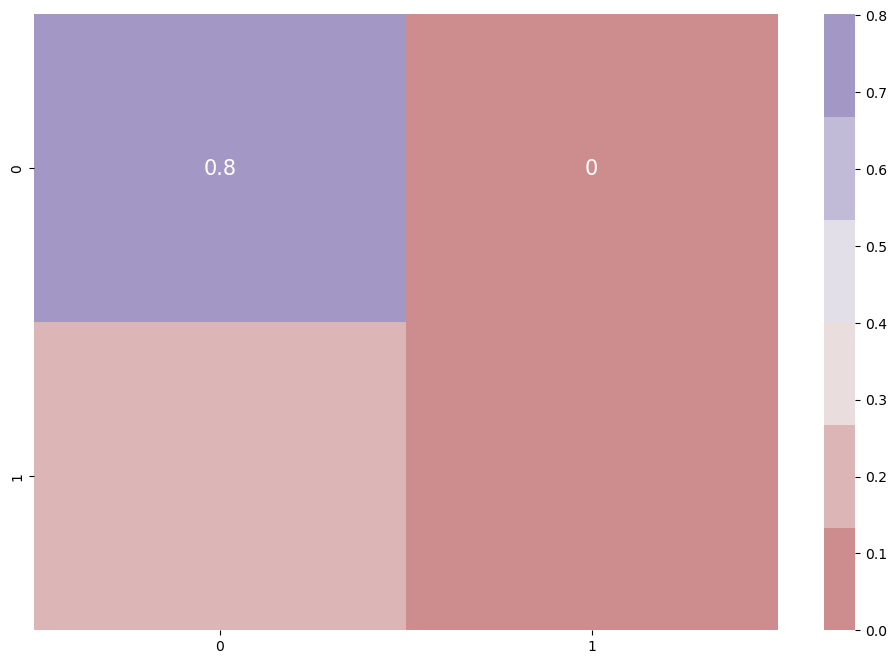

In [26]:
# confusion matrix
cmap1 = sns.diverging_palette(10,275,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

<b> Predicted Values

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2003
           1       0.00      0.00      0.00       497

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500

